# **Classification of clothing images, FASHION-MNIST**
В работе использовался датасет Fashion-MNIST(https://www.tensorflow.org/datasets/catalog/fashion_mnist?hl=ru), который представляет собой набор изображений статей Zalando, состоящий из обучающего набора из 60 000 примеров и тестового набора из 10 000 примеров. Каждый пример представляет собой изображение в градациях серого 28x28, связанное с меткой из 10 классов.


In [45]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout
from tensorflow.keras.layers import GlobalMaxPooling2D, MaxPooling2D
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras import layers, models, datasets, utils

In [46]:
(x_train, y_train), (x_test, y_test) = datasets.fashion_mnist.load_data()

x_train = x_train.reshape((x_train.shape[0], 28, 28, 1))
x_test = x_test.reshape((x_test.shape[0], 28, 28, 1))
x_train, x_test = x_train / 255.0, x_test / 255.0

y_train = utils.to_categorical(y_train, 10)
y_test = utils.to_categorical(y_test, 10)

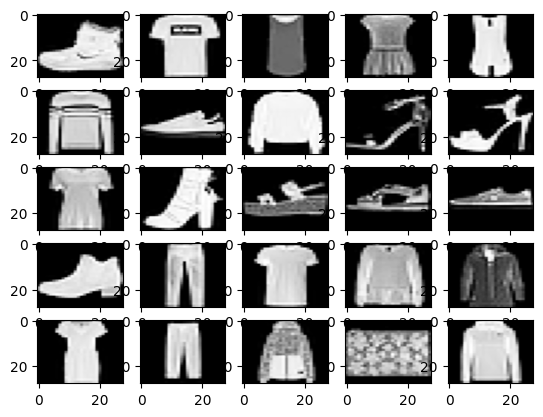

In [111]:
fig, ax = plt.subplots(5, 5)
k = 0

for i in range(5):
    for j in range(5):
        ax[i][j].imshow(x_train[k], aspect='auto', cmap='Greys_r')
        k += 1

plt.show()

## **Model 1: Simple Artificial Neural Network**

In [56]:
def build_simple_cnn_model(input_shape, num_of_classes):
    model = models.Sequential()
    model.add(layers.Flatten())
    model.add(layers.Dense(1000, activation='relu'))
    model.add(layers.Dense(500, activation='relu'))
    model.add(layers.Dense(num_of_classes, activation='softmax'))

    return model

input_shape = x_train.shape[1:]
num_of_classes = 10
model = build_simple_cnn_model(input_shape, num_of_classes)

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.build((None, 28, 28, 1))

model.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_11 (Flatten)        (None, 784)               0         
                                                                 
 dense_31 (Dense)            (None, 1000)              785000    
                                                                 
 dense_32 (Dense)            (None, 500)               500500    
                                                                 
 dense_33 (Dense)            (None, 10)                5010      
                                                                 
Total params: 1290510 (4.92 MB)
Trainable params: 1290510 (4.92 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [109]:
history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
1500/1500 [==============================] - 38s 25ms/step - loss: 0.4862 - accuracy: 0.8225 - val_loss: 0.4112 - val_accuracy: 0.8537
Epoch 2/10
1500/1500 [==============================] - 38s 25ms/step - loss: 0.3652 - accuracy: 0.8656 - val_loss: 0.3791 - val_accuracy: 0.8611
Epoch 3/10
1500/1500 [==============================] - 39s 26ms/step - loss: 0.3248 - accuracy: 0.8810 - val_loss: 0.3347 - val_accuracy: 0.8817
Epoch 4/10
1500/1500 [==============================] - 36s 24ms/step - loss: 0.3003 - accuracy: 0.8888 - val_loss: 0.3413 - val_accuracy: 0.8775
Epoch 5/10
1500/1500 [==============================] - 38s 25ms/step - loss: 0.2814 - accuracy: 0.8955 - val_loss: 0.3319 - val_accuracy: 0.8801
Epoch 6/10
1500/1500 [==============================] - 39s 26ms/step - loss: 0.2673 - accuracy: 0.9004 - val_loss: 0.3223 - val_accuracy: 0.8817
Epoch 7/10
1500/1500 [==============================] - 35s 23ms/step - loss: 0.2568 - accuracy: 0.9019 - val_loss: 0.3189 -

In [112]:
scores = model.evaluate(x_test, y_test, verbose=0)
print("accuracy: %.2f%%" % (scores[1]*100))

accuracy: 88.08%


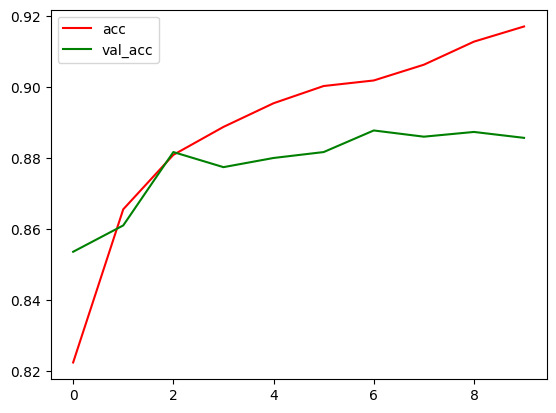

In [113]:
plt.plot(history.history['accuracy'], label='acc', color='red')
plt.plot(history.history['val_accuracy'], label='val_acc', color='green')
plt.legend()

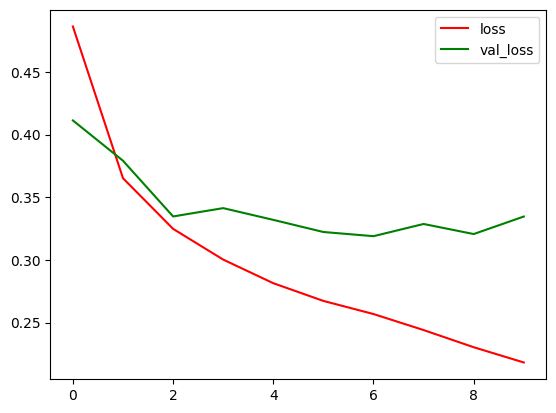

In [114]:
plt.plot(history.history['loss'], label='loss', color='red')
plt.plot(history.history['val_loss'], label='val_loss', color='green')
plt.legend()

In [120]:
!pip install pillow

1/1 [==============================] - 0s 28ms/step
Origin class is Pullover and predicted class is T-shirt/top


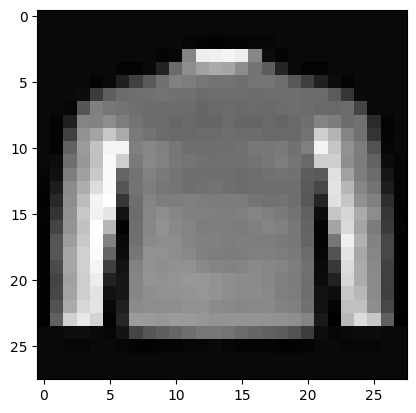

In [125]:
from PIL import Image, ImageOps
import numpy as np

class_labels = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

image_path = "pullover.jpg"
image = Image.open(image_path)

inverted_image = ImageOps.invert(image)

image_resized = inverted_image.resize((28, 28))

if image_resized.mode != 'L':
    image_resized = image_resized.convert('L')


image_array = np.array(image_resized) / 255.0

image_array = np.expand_dims(image_array, axis=0)
image_array = np.expand_dims(image_array, axis=-1)
plt.imshow(image_array[0], cmap='Greys_r')


predicted_label = class_labels[model.predict(image_array).argmax()]
original_label = class_labels[2]


print("Origin class is {} and predicted class is {}".format(original_label, predicted_label))

# **Model 2: Convolutional Neural Network**

In [74]:
def build_cnn_model(input_shape, num_of_classes):
    model = models.Sequential()
    model.add(layers.Conv2D(32, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Flatten())
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(num_of_classes, activation='softmax'))

    return model

model_2 = build_cnn_model(input_shape, num_of_classes)

model_2.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model_2.build((None, 28, 28, 1))

model_2.summary()

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_19 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_14 (MaxPooli  (None, 13, 13, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_20 (Conv2D)          (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_15 (MaxPooli  (None, 5, 5, 64)          0         
 ng2D)                                                           
                                                                 
 flatten_18 (Flatten)        (None, 1600)              0         
                                                                 
 dense_50 (Dense)            (None, 64)              

In [75]:
history_2 = model_2.fit(x_train, y_train, epochs=10, batch_size=64, validation_split=0.2)

Epoch 1/10
750/750 [==============================] - 60s 79ms/step - loss: 0.5568 - accuracy: 0.7978 - val_loss: 0.3832 - val_accuracy: 0.8613
Epoch 2/10
750/750 [==============================] - 51s 68ms/step - loss: 0.3618 - accuracy: 0.8696 - val_loss: 0.3466 - val_accuracy: 0.8748
Epoch 3/10
750/750 [==============================] - 56s 75ms/step - loss: 0.3152 - accuracy: 0.8855 - val_loss: 0.3238 - val_accuracy: 0.8832
Epoch 4/10
750/750 [==============================] - 52s 69ms/step - loss: 0.2827 - accuracy: 0.8965 - val_loss: 0.3020 - val_accuracy: 0.8903
Epoch 5/10
750/750 [==============================] - 51s 68ms/step - loss: 0.2593 - accuracy: 0.9065 - val_loss: 0.2862 - val_accuracy: 0.8957
Epoch 6/10
750/750 [==============================] - 53s 71ms/step - loss: 0.2376 - accuracy: 0.9132 - val_loss: 0.2772 - val_accuracy: 0.9022
Epoch 7/10
750/750 [==============================] - 55s 73ms/step - loss: 0.2205 - accuracy: 0.9196 - val_loss: 0.2711 - val_accuracy:

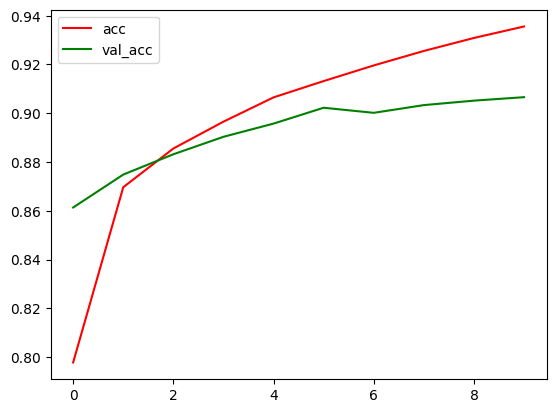

In [76]:
plt.plot(history_2.history['accuracy'], label='acc', color='red')
plt.plot(history_2.history['val_accuracy'], label='val_acc', color='green')
plt.legend()

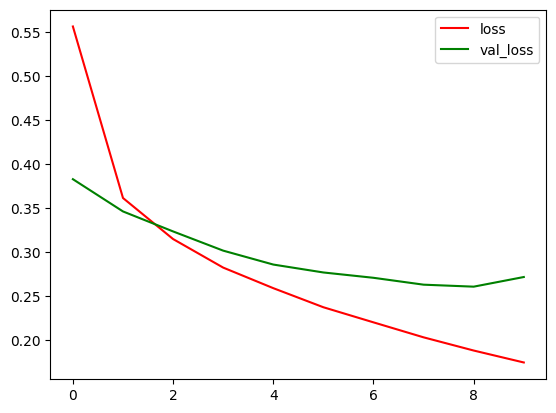

In [77]:
plt.plot(history_2.history['loss'], label='loss', color='red')
plt.plot(history_2.history['val_loss'], label='val_loss', color='green')
plt.legend()

1/1 [==============================] - 0s 107ms/step
Origi class is Pullover and predicted class is Pullover


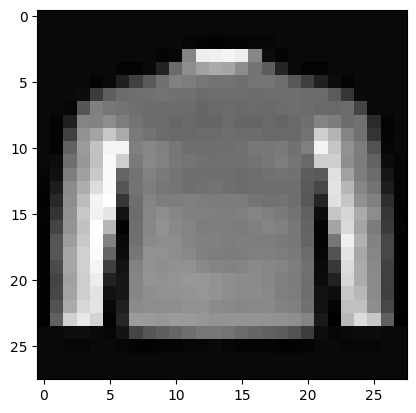

In [127]:
plt.imshow(image_array[0], cmap='Greys_r')


predicted_label = class_labels[model_2.predict(image_array).argmax()]
original_label = class_labels[2]


print("Origi class is {} and predicted class is {}".format(original_label, predicted_label))

# **Model 3: Convolutional Neural Network with dropout**

In [130]:
def build_cnn_dropout_model(input_shape, num_of_classes):
    model = models.Sequential()
    model.add(layers.Conv2D(32, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Flatten())
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dropout(0.2))
    model.add(layers.Dense(num_of_classes, activation='softmax'))

    return model

model_3 = build_cnn_dropout_model(input_shape, num_of_classes)

model_3.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model_3.build((None, 28, 28, 1))

model_3.summary()

Model: "sequential_30"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_40 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_35 (MaxPooli  (None, 13, 13, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_41 (Conv2D)          (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_36 (MaxPooli  (None, 5, 5, 64)          0         
 ng2D)                                                           
                                                                 
 flatten_28 (Flatten)        (None, 1600)              0         
                                                                 
 dense_68 (Dense)            (None, 64)              

In [131]:
history_3 = model_3.fit(x_train, y_train, epochs=10, batch_size=64, validation_split=0.2)

Epoch 1/10
750/750 [==============================] - 47s 61ms/step - loss: 0.6163 - accuracy: 0.7790 - val_loss: 0.4034 - val_accuracy: 0.8511
Epoch 2/10
750/750 [==============================] - 50s 66ms/step - loss: 0.3894 - accuracy: 0.8596 - val_loss: 0.3312 - val_accuracy: 0.8802
Epoch 3/10
750/750 [==============================] - 48s 64ms/step - loss: 0.3385 - accuracy: 0.8765 - val_loss: 0.3066 - val_accuracy: 0.8878
Epoch 4/10
750/750 [==============================] - 44s 59ms/step - loss: 0.3073 - accuracy: 0.8881 - val_loss: 0.2907 - val_accuracy: 0.8907
Epoch 5/10
750/750 [==============================] - 49s 65ms/step - loss: 0.2803 - accuracy: 0.8981 - val_loss: 0.2751 - val_accuracy: 0.8989
Epoch 6/10
750/750 [==============================] - 44s 59ms/step - loss: 0.2607 - accuracy: 0.9038 - val_loss: 0.2609 - val_accuracy: 0.9043
Epoch 7/10
750/750 [==============================] - 45s 59ms/step - loss: 0.2429 - accuracy: 0.9111 - val_loss: 0.2561 - val_accuracy:

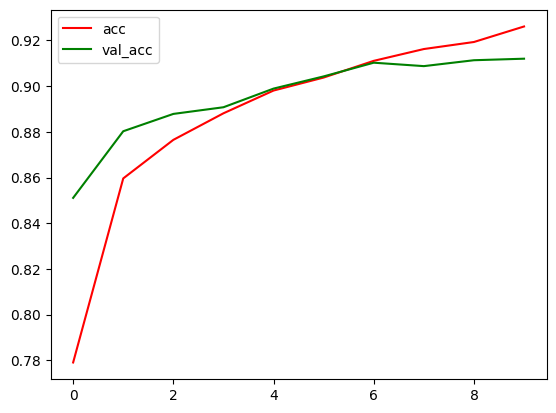

In [132]:
plt.plot(history_3.history['accuracy'], label='acc', color='red')
plt.plot(history_3.history['val_accuracy'], label='val_acc', color='green')
plt.legend()

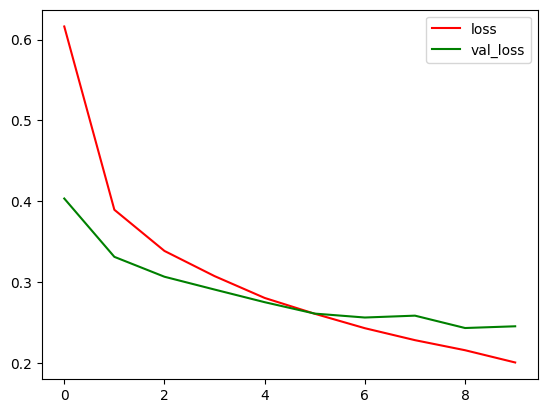

In [133]:
plt.plot(history_3.history['loss'], label='loss', color='red')
plt.plot(history_3.history['val_loss'], label='val_loss', color='green')
plt.legend()

1/1 [==============================] - 0s 81ms/step
Origi class is Pullover and predicted class is Pullover


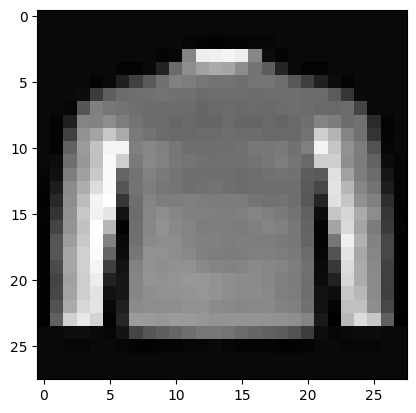

In [134]:
plt.imshow(image_array[0], cmap='Greys_r')


predicted_label = class_labels[model_3.predict(image_array).argmax()]
original_label = class_labels[2]


print("Origi class is {} and predicted class is {}".format(original_label, predicted_label))